In [1]:
# %matplotlib widget

import numpy as np
from numpy import sin, cos, pi
import matplotlib.pyplot as plt
from ibsen.orbit import Orbit
from ibsen.winds import Winds
from ibsen.ibs import IBS


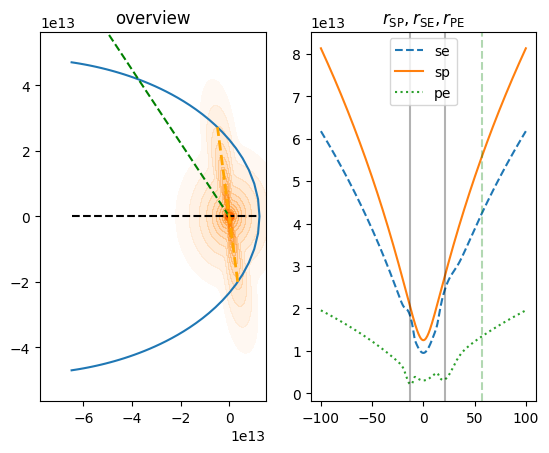

In [2]:

DAY = 86400.
AU = 1.5e13

sys_name = 'psrb' 
orb = Orbit(sys_name = sys_name, n=1003)
winds_full = Winds(orbit=orb, sys_name = sys_name, alpha=-10/180*pi, incl=23*pi/180,
              f_d=165, f_p=0.1, delta=0.02, np_disk=3, rad_prof='pl', r_trunk=None,
             height_exp=0.25,
                 ns_field_model = 'linear', ns_field_surf = 1, ns_r_scale = 1e13,
                 opt_field_model = 'linear', opt_field_surf = 0, opt_r_scale = 1e13,)
winds_full.peek(showtime=(-100*DAY, 100*DAY))
plt.show()


10.70786738395691


(1e+45, 1e+49)

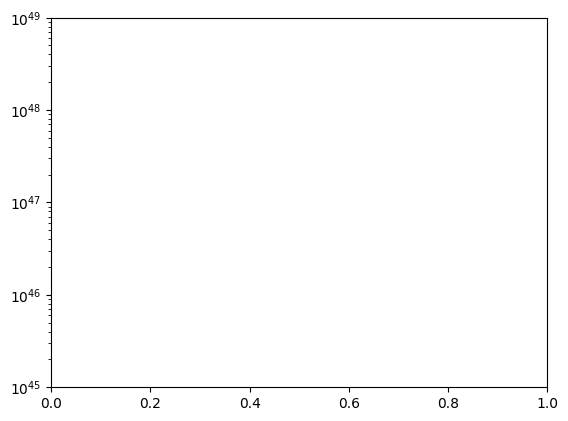

In [3]:

from ibsen.el_ev import NonstatElectronEvol
import time
el = NonstatElectronEvol(winds=winds_full, t_start=-7*DAY, t_stop=47*DAY,
                        emin=1e9, emax=1e13, emin_grid=1e8, emax_grid=1e13,
                        n_t=1001, p_e=1.7, init_distr='stat', eps_big=5e-3, eps_small=3e-3,
                        n_dec_e=201)
start = time.time()
ts, es, ns = el.calculate(to_return=True)
e_ = es[1, :]
print(time.time() - start)
# ts, edots, qs, es = el.calculate(to_return=True)
# print(ts/DAY)
# plt.plot(es, -es/edots[3, :])
# plt.plot(es, -es/edots[20, :])
# plt.plot(es, -es/edots[40, :])
# plt.plot(es, -es/edots[60, :])
# plt.plot(es, qs[3, :])
# plt.plot(es, qs[20, :])
# plt.plot(es, qs[40, :])
# plt.plot(es, qs[60, :])
# e_ = el.e_grid
# plt.plot(e_, ns[0, :]*e_**2)
# plt.plot(e_, ns[int(ts.size/10), :]*e_**2)
# plt.plot(e_, ns[int(ts.size/2), :]*e_**2)
# plt.plot(e_, ns[int(ts.size*0.9), :]*e_**2)
# plt.xscale('log')
plt.yscale('log')
plt.ylim(1e45, 1e49)
# plt.ylim(1e46, 3e48)


(382,)
(382, 1004)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(1e+45, 1e+49)

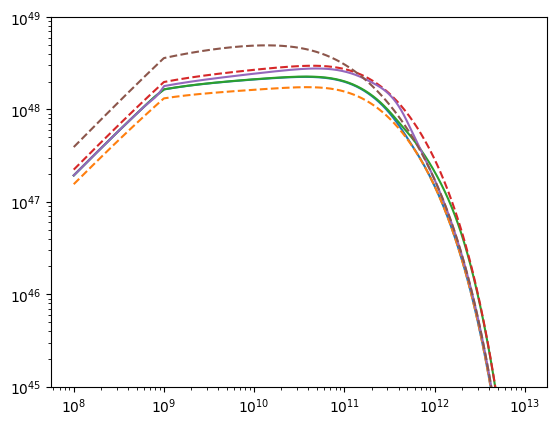

In [4]:
# plt.plot(e_, ns[0, :]*e_**2)
print(el.ts.shape)
print(el.dNe_des.shape)
print(type(el.ts))
print(type(el.dNe_des))
plt.plot(e_, el.dne_de(0)*e_**2)
plt.plot(e_, el.stat_distr_at_time(0, e_)*e_**2, ls='--')

# plt.plot(e_, el.dne_de(0+orb.T)*e_**2)
# plt.plot(e_, el.dne_de(0+2*orb.T)*e_**2)
# plt.plot(e_, el.dne_de(0+3*orb.T)*e_**2)
plt.plot(e_, el.dne_de(10*DAY)*e_**2)
plt.plot(e_, el.stat_distr_at_time(10*DAY, e_)*e_**2, ls='--')

plt.plot(e_, el.dne_de(20*DAY)*e_**2)
plt.plot(e_, el.stat_distr_at_time(20*DAY, e_)*e_**2, ls='--')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e45, 1e49)

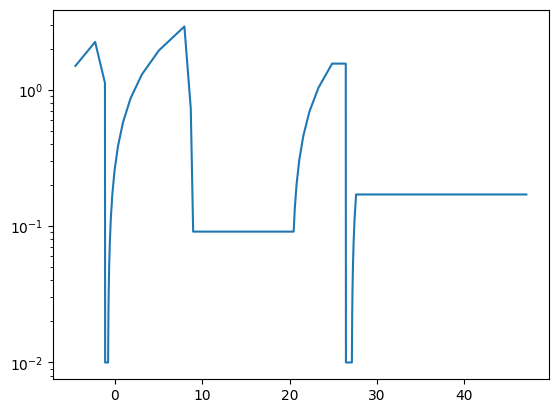

In [5]:
# %matplotlib widget

from scipy.integrate import trapezoid, cumulative_trapezoid, solve_ivp
dt = ts[1:] - ts[:-1]
plt.plot(ts[1:]/DAY, dt/DAY)
plt.yscale('log')

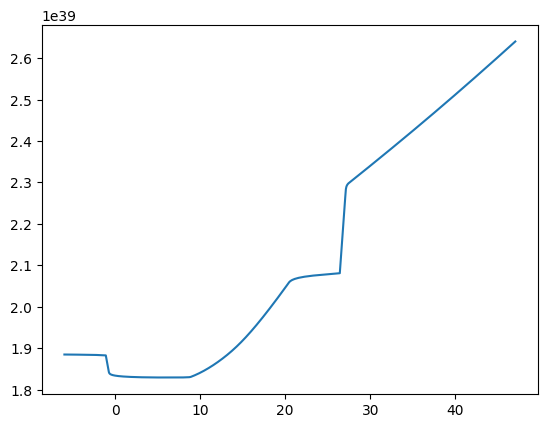

In [6]:
# %matplotlib

mask = np.logical_and(e_ < 1e13, e_ > 1e9)
Ntot = trapezoid(ns[:, mask], e_[mask], axis=1)
plt.plot(ts/DAY, Ntot)
